max 0.0009968180458354015


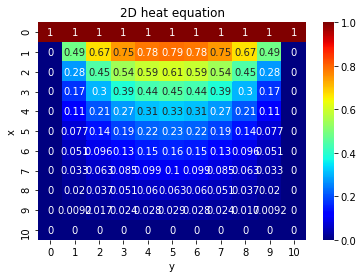

In [9]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

N = 11
M = 11
dx = 1.0 / (N - 1)
dy = 1.0 / (M - 1)
dt = 0.5 / (1.0 / (dx * dx) + 1.0 / (dy * dy))

eps = 0.00001
maximum = 1
u = np.zeros([N, M], dtype = float) # initial condition
un = np.zeros([N, M], dtype = float)


it = 0
# while maximum > eps : 
while it < 60 : 


    it += 1
    #boundary condition
    for i in range(N):
        for j in range(M):
            u[0][j] = 1.0
            u[N - 1][j] = 0.0
            u[i][0] = 0.0
            u[i][N - 1] = 0.0

            un[0][j] = 1.0
            un[N - 1][j] = 0.0
            un[i][0] = 0.0
            un[i][N - 1] = 0.0

    
    for i in range(1,N - 1):
        for j in range(1,M - 1):
            un[i][j] = u[i][j] + dt * ((u[i + 1][j] - 2.*u[i][j] + u[i - 1][j])/(dx * dx) 
                           + (u[i][j + 1] - 2.*u[i][j] + u[i][j - 1])/(dy * dy))
    
    for i in range(N):
        for j in range(M):
            u[0][j] = 1.0
            u[N - 1][j] = 0.0
            u[i][0] = 0.0
            u[i][N - 1] = 0.0

            un[0][j] = 1.0
            un[N - 1][j] = 0.0
            un[i][0] = 0.0
            un[i][N - 1] = 0.0


    maximum = 0
    for i in range(N):
        for j in range(M):
            mod = fabs(un[i][j] - u[i][j])
            if mod > maximum:
                maximum = mod
    
    for i in range(N):
        for j in range(M):
            u[i][j] = un[i][j]
            
# print('iter ', it)            
# print('|x   |y    |u')
# print('-------------------')
Fout = open("D:/out2.dat", "w")
Fout.write("VARIABLES = \"X\",\"Y\",\"P\"\n")
Fout.write("ZONE I=11, J=11, F=POINT\n")
for i in range(N):
    for j in range(M):
        w = str(i * dx) + " " + str(j * dy) +" " + str(u[i][j])
        Fout.write(w + "\n")
#     print('--------------------')  
df = pd.DataFrame(un)
print('max' , maximum)
sns.heatmap(df, annot = True, cmap = 'jet')
plt.xlabel('y')
plt.ylabel('x')
plt.title('2D heat equation')
plt.savefig('heat.png')
Fout.close()
